In [7]:
from json import load
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot
from math import exp, sin, cos, sqrt, log
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.size'] = 16.0
%matplotlib inline  
sns.set()

In [8]:
def three_diagonal_matrix(diag_a, diag_b, diag_c, function):
    n = len(diag_a)
    y = [0] * n
    
    c, d = [diag_c[0] / diag_b[0]], [function[0] / diag_b[0]]

    for i in range(1, n):
        c.append(diag_c[i] / (diag_b[i] - diag_a[i] * c[i - 1]))
        d.append((-diag_a[i] * d[i - 1] + function[i]) / (diag_b[i] - diag_a[i] * c[i - 1]))

    y[-1] = d[-1]

    for i in reversed(range(n - 1)):
#     for i in range(0, n-1, -1):
        y[i] = -c[i] * y[i + 1] + d[i]

    return y

In [9]:
def get_x_t_xs_ys(h, T, tau):
    
    k_h = v * tau / h
    k_p = mu_x_t * tau / h ** 2
    
    N = int(l / h)
    M = int(T / tau)
    
    x = np.arange(0, N + 1, h)[: N + 1]
    t = np.arange(0, M + 1, tau)[: M + 1]

    xs = [x] * (M + 1)
    ys = np.zeros((M + 1, N + 1))
    for i in range((M + 1)):
        ys[i, :] = [t[i]] * (N + 1)
        
    return M, N, x, t, xs, ys, k_h, k_p

# Task 1

## schema 4

In [10]:
v = 3
l = 1
T = 0.1
u_0 = 50
h = 0.02
tau = 0.001
mu_x_t = 0.05

In [11]:
M, N, x, t, xs, ys, k_h, k_p = get_x_t_xs_ys(h, T, tau)

In [12]:
y = np.zeros((M + 1, N + 1))
y[:, 0] = u_0

for j in range(M):
    for k in range(1, N):
        y[j + 1][k] = -1/2 * k_h * (y[j][k + 1] - y[j][k - 1]) + k_p * (y[j][k + 1] - 2 * y[j][k] + y[j][k - 1]) + y[j][k]
        y[j + 1][N] = (k_h * y[j + 1][N - 1] + y[j][N]) / (1 + k_h)

In [13]:
# analytic
analytic = np.zeros((M +1, N + 1))

for j in range(M + 1):
    for k in range(N + 1):
        if xs[j][k] >= v * ys[j][k]:
            analytic[j][k] = 0
        else:
            analytic[j][k] = u_0

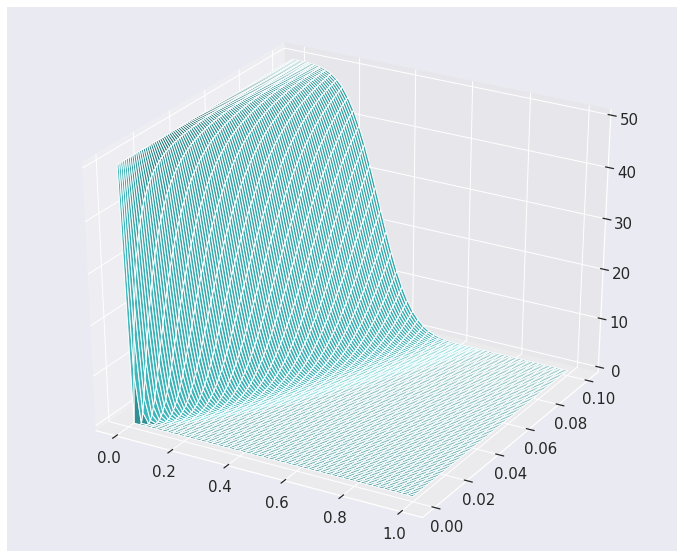

In [14]:
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_zticklabels(np.arange(0, 51, 10), fontsize = 15)

ax.plot_surface(xs, ys, y, rstride=1, cstride=1, linewidth=1, color='#46d1d6')

plt.show()

# Task 2

In [15]:
v = 1
l = 1
T = 1
h = 0.01
tau = 0.005
mu_x_t = 0.01
k_x_t = "(-6*x*t**2 +4*(x**2)*t**3 - 2*t**3 + 1.98*(t**4))/(2*x*t**3 - x**2*t**4 + 2)"
u_0_x = "2"
g_0_t = "2"
g_1_t = "2*t**3 - t**4 + 2"
analytic = "2*x*(t**3) - x**2*(t**4) + 2"

In [16]:
def func_k(x, t):
    return eval(k_x_t)

def func_u0(x):
    return eval(u_0_x)

def func_g0(t):
    return eval(g_0_t)

def func_g1(t):
    return eval(g_1_t)

def func_an(x, t):
    return eval(analytic)

In [17]:
M, N, x, t, xs, ys, k_h, k_p = get_x_t_xs_ys(h, T, tau)

ktx = np.array([[func_k(i, j) for i in x] for j in t])
u0 = np.array([func_u0(i) for i in x])
g0 = np.array([func_g0(i) for i in t])
g1 = np.array([func_g1(i) for i in t])
an_sol = np.array([[func_an(i, j) for i in x] for j in t])

y_1 = np.zeros((M + 1, N + 1))
y_1[0] = u0
y_2 = np.zeros((M + 1, N + 1))
y_2[0] = u0

for i in range(M + 1):
    y_1[i][0] = g0[i]
    y_2[i][0] = g0[i]
    y_1[i][N] = g1[i]
    y_2[i][N] = g1[i]

In [18]:
def equation_4():
    
    for j in range(M):
        for k in range(1, N):
            y_1[j + 1][k] = -0.5 * k_h * (y_1[j][k + 1] - y_1[j][k - 1]) + k_p * (y_1[j][k + 1] - 2 * y_1[j][k] +
                           y_1[j][k - 1]) - tau * ktx[j][k] * y_1[j][k] + y_1[j][k]

        y_1[j + 1][N] = (k_h * y_1[j + 1][N - 1] + y_1[j][N]) / (1 + k_h)
        
    return y_1

In [21]:
def equation_14():
    k_t_x = [[func_k(i, j + tau / 2) for i in x] for j in t]

    # y_{k - 1}
    a_diag = np.full((N - 1, ), - 1 / 4 * k_h - 1 / 2 * k_p)
    a_diag = np.insert(a_diag, 0, 0)
    a_diag = np.append(a_diag, 0)
    
    # y_{k + 1}
    c_diag = np.full((N - 1, ), 1 / 4 * k_h - 1 / 2 * k_p)
    c_diag = np.insert(c_diag, 0, 0)
    c_diag = np.append(c_diag, 0)

    for j in range(M):

        # near y_{k}
        b_diag = [k_p + 0.5 * k_t_x[j][k] * tau + 1 for k in range(N - 1)]
        b_diag.insert(0, 1)
        b_diag.append(1)

        f = [y_2[j][k + 1] * (- 1 / 4 * k_h + 1 / 2 * k_p) + y_2[j][k] * (1 - k_p - 1 / 2 * ktx[j][k] * tau) +
             y_2[j][k - 1] * (1 / 4 * k_h + 1 / 2 * k_p) for k in range(1, N)]
        f.insert(0, y_2[j + 1][0])
        f.append((y_2[j + 1][N]))

        y_2[j + 1] = three_diagonal_matrix(a_diag, b_diag, c_diag, f)
        
    return y_2

In [22]:
y_1 = equation_4()
y_2 = equation_14()

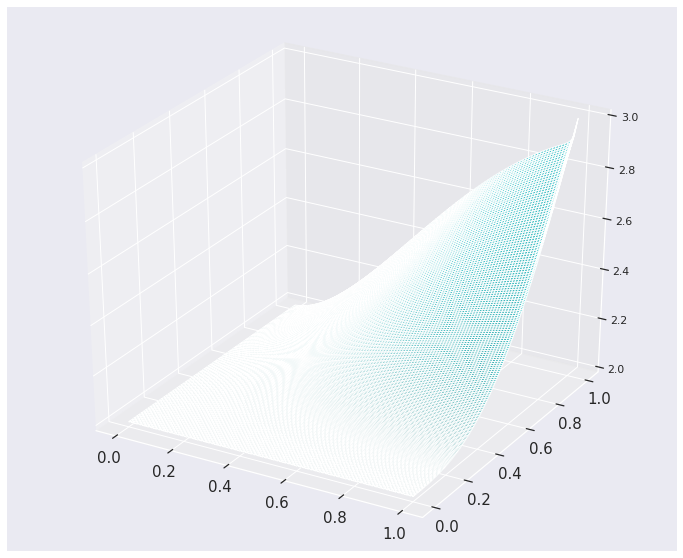

In [23]:
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#ax.set_zticklabels(np.arange(0, 3.1, 0.2), fontsize = 15)

ax.plot_surface(xs, ys, y_2, rstride=1, cstride=1, linewidth=1, color='#46d1d6')

plt.show()